In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update
!apt-get install build-essential

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,868 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:13 https://ppa.launchpadcontent.net/

In [ ]:
%cd /content/
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet/

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15900, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 15900 (delta 18), reused 13 (delta 5), pack-reused 15863 (from 3)
Receiving objects: 100% (15900/15900), 14.48 MiB | 19.35 MiB/s, done.
Resolving deltas: 100% (10701/10701), done.
/content/darknet


In [ ]:
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [ ]:
%cd /content/darknet/
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

/content/darknet
--2025-04-27 08:00:31--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 172.67.185.199, 104.21.88.156, 2606:4700:3037::6815:589c, ...
Connecting to pjreddie.com (pjreddie.com)|172.67.185.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights     [ <=>                ]   8.88K  --.-KB/s    in 0s      

2025-04-27 08:00:32 (21.2 MB/s) - ‘yolov3-tiny.weights’ saved [9093]



In [ ]:
def leer_loss_txt(ruta_loss_txt):
    iteraciones = []
    loss = []
    map50 = []

    with open(ruta_loss_txt, 'r') as file:
        for line in file.readlines():
            if "avg" in line:
                partes = line.split(',')
                iteracion = int(partes[0].split(":")[0])
                avg_loss = float(partes[0].split("avg")[1])
                iteraciones.append(iteracion)
                loss.append(avg_loss)
            if "mAP@0.5" in line:
                # Extrae mAP si está disponible
                partes = line.split(':')
                if len(partes) > 2:
                    valor_map = float(partes[2].split('%')[0])
                    map50.append(valor_map)

    return iteraciones, loss, map50

In [ ]:
def graficar_entrenamiento(ruta_loss_txt):
    iteraciones, loss, map50 = leer_loss_txt(ruta_loss_txt)

    plt.figure(figsize=(16,6))

    # Gráfica de Training Loss
    plt.subplot(1,2,1)
    plt.plot(iteraciones, loss, label='Training Loss', color='blue')
    plt.xlabel('Iteraciones')
    plt.ylabel('Loss Promedio')
    plt.title('Training Loss durante el entrenamiento')
    plt.grid(True)
    plt.legend()

    # Gráfica de mAP si existe
    if map50:
        plt.subplot(1,2,2)
        # mAP puede tener menos puntos que loss
        puntos = list(range(len(map50)))
        plt.plot(puntos, map50, label='mAP@0.5 (%)', color='green')
        plt.xlabel('Chekeos de mAP (cada 1000 iteraciones)')
        plt.ylabel('mAP (%)')
        plt.title('Evolución de mAP@0.5 durante entrenamiento')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
ruta_loss_txt = '/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/results/obj_train.log'

In [ ]:
graficar_entrenamiento(ruta_loss_txt)

IndexError: list index out of range

In [ ]:
%cd /content/darknet
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3-tiny.conv.15 -O yolov3-tiny.conv.15

/content/darknet
--2025-04-27 08:42:58--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3-tiny.conv.15
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-27 08:42:59 ERROR 404: Not Found.



In [ ]:
!./darknet detector train /content/drive/MyDrive/modelos_tesis/obj.data /content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg yolov3-tiny.conv.15 -dont_show | tee /content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/results/obj_train.log

Se han truncado las últimas 5000 líneas del flujo de salida.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.851104), count: 2, class_loss = 1.387936, iou_loss = 0.058282, total_loss = 1.446218 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), count: 1, class_loss = 0.000047, iou_loss = 0.000000, total_loss = 0.000047 
 total_bbox = 276423, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.880668), count: 2, class_loss = 0.634375, iou_loss = 0.153272, total_loss = 0.787647 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.887062), count: 1, class_loss = 0.457324, iou_loss = 0.025288, total_loss = 0.482612 
 total_bbox = 276426, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.761594), count: 2, class_loss = 0.348722, iou_loss = 0.279222, total_loss = 0.62794

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_1000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_2000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_3000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_4000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_5000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_6000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_7000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_8000.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_final.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
!./darknet detector map \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_last.weights

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

In [ ]:
%cd /content/darknet/

/content/darknet


In [ ]:
!./darknet detector test \
/content/drive/MyDrive/modelos_tesis/obj.data \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_7000.weights \
/content/drive/MyDrive/modelos_tesis/dataset_dividido/test/images/fcb311b4-a8ec-4cfa-98f0-5b89d7426ba9_227.jpg \
-thresh 0.25


 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

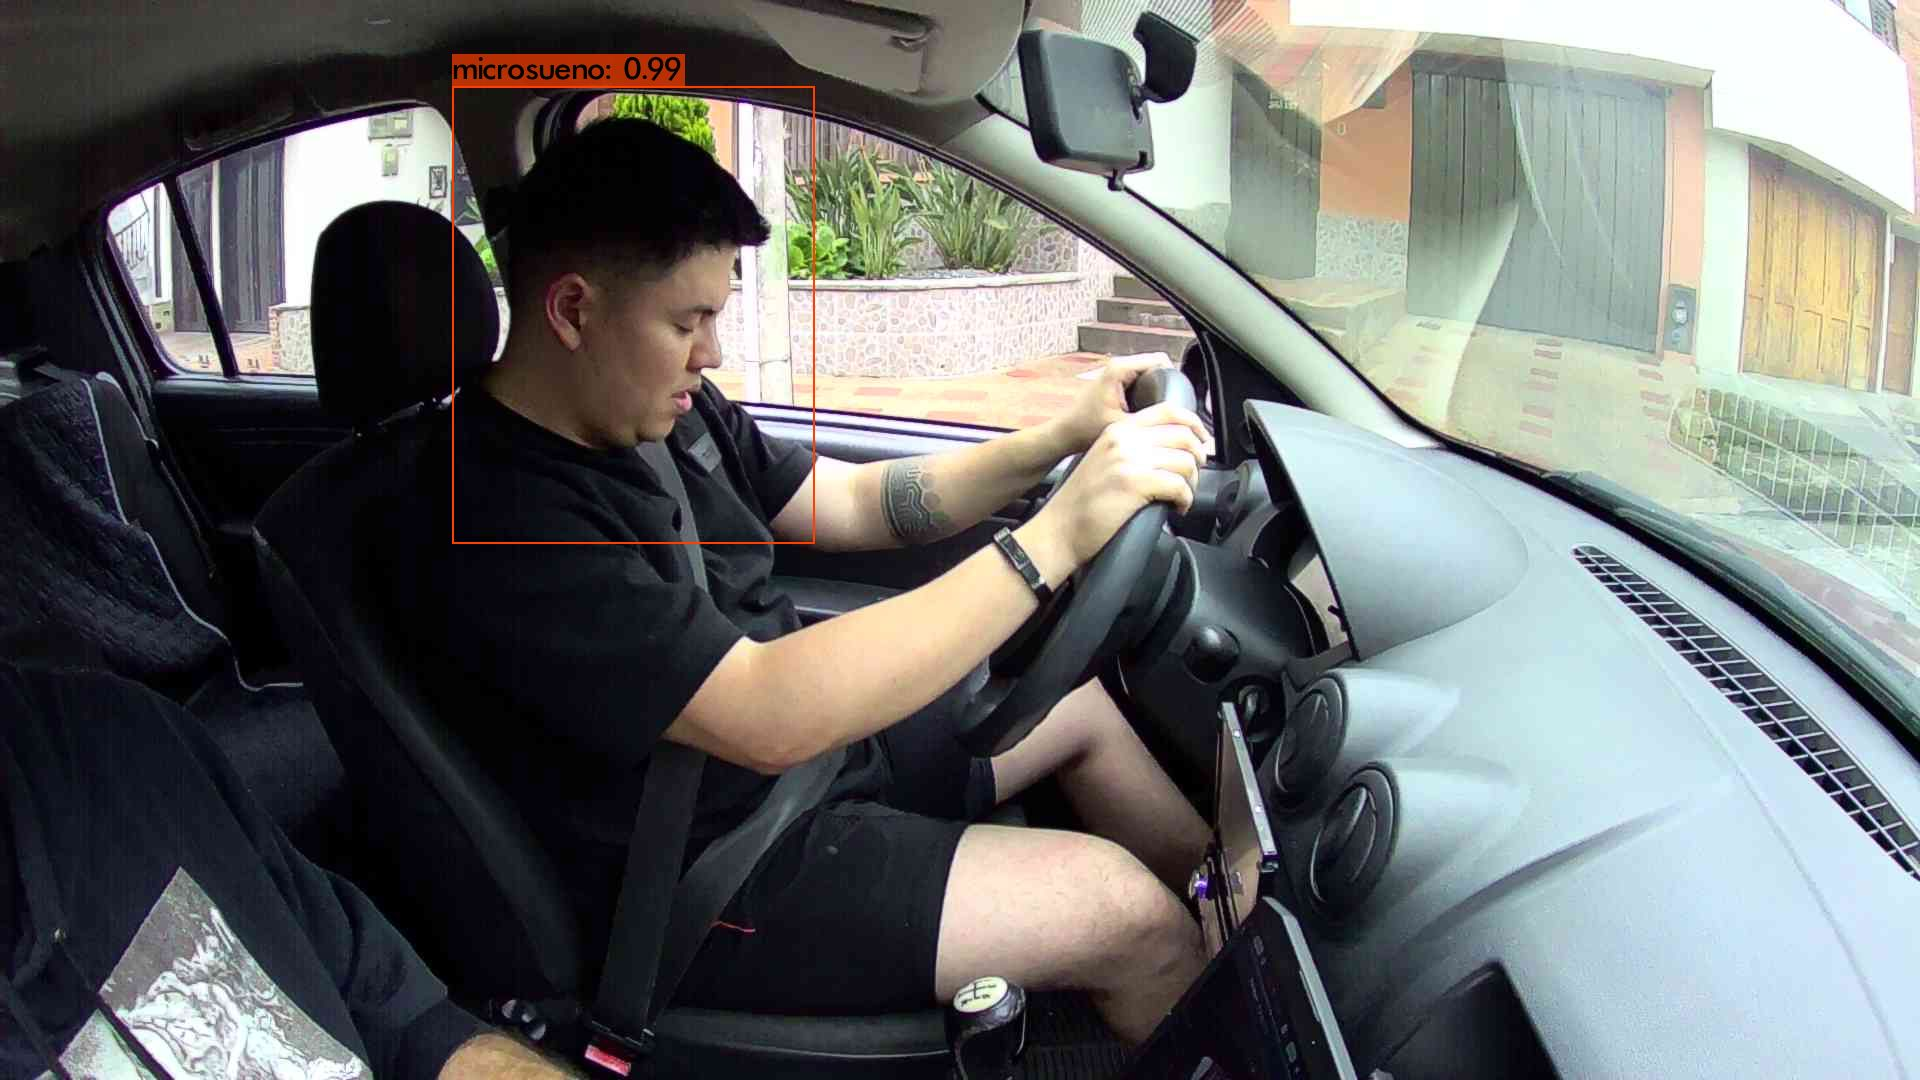

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/darknet/predictions.jpg'))

In [ ]:
# Recorrer cada imagen en test.txt
with open('/content/drive/MyDrive/modelos_tesis/dataset_dividido/test.txt', 'r') as file:
    imagenes = file.read().splitlines()

for imagen in imagenes:
    # Ejecutar la detección para cada imagen
    !./darknet detector test \
    /content/drive/MyDrive/modelos_tesis/obj.data \
    /content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/yolov3-tiny.cfg \
    /content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/backup/yolov3-tiny_7000.weights \
    {imagen} \
    -thresh 0.25 -dont_show -out result.json

    # Guardar cada predicción individual
    import shutil
    import os

    nombre_imagen = os.path.basename(imagen)
    nombre_salida = nombre_imagen.replace('.jpg', '_prediccion.jpg')

    shutil.copy('/content/darknet/predictions.jpg', f'/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/results{nombre_salida}')

Se han truncado las últimas 5000 líneas del flujo de salida.
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max                2x 2/ 1     13 x

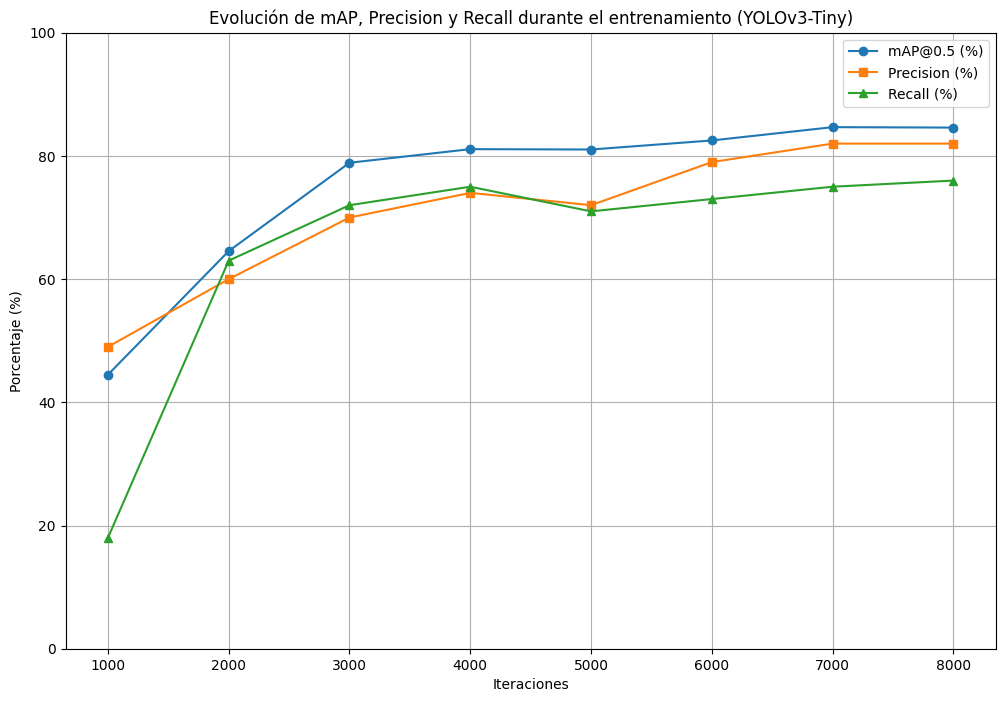

In [ ]:
from matplotlib import pyplot as plt
iteraciones_v3 = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
map_scores_v3 = [44.48, 64.55, 78.89, 81.10, 81.04, 82.51, 84.67, 84.60]
precision_scores_v3 = [49, 60, 70, 74, 72, 79, 82, 82]
recall_scores_v3 = [18, 63, 72, 75, 71, 73, 75, 76]

plt.figure(figsize=(12, 8))

plt.plot(iteraciones_v3, map_scores_v3, marker='o', label='mAP@0.5 (%)')

plt.plot(iteraciones_v3, precision_scores_v3, marker='s', label='Precision (%)')

plt.plot(iteraciones_v3, recall_scores_v3, marker='^', label='Recall (%)')

plt.title('Evolución de mAP, Precision y Recall durante el entrenamiento (YOLOv3-Tiny)')
plt.xlabel('Iteraciones')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.xticks(iteraciones_v3)
plt.ylim(0, 100)

plt.show()


In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=155281972237a9028f1761a26046f1c3e1557258cce53e613b9bdc4aa59f3d6a
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
from fpdf import FPDF
import os
from datetime import datetime

map_general = 84.67  # Pones aquí el mejor mAP@0.5 de YOLOv3-Tiny
precision_general = 75  # % precision
recall_general = 82     # % recall
f1_general = 0.79       # F1-Score

# Crear PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Directorio de resultados
directorio_resultados = '/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/results'
imagenes_predichas = [f for f in os.listdir(directorio_resultados) if f.endswith('.jpg')]

# Tomamos TODAS las imágenes disponibles
muestras = imagenes_predichas

# Título
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Informe de Resultados de Inferencia - YOLOv3-Tiny", ln=True, align="C")
pdf.ln(5)

# Fecha
fecha_actual = datetime.now().strftime("%d/%m/%Y")
pdf.set_font("Arial", '', 12)
pdf.cell(0, 10, f"Fecha de generación: {fecha_actual}", ln=True, align="C")
pdf.ln(10)

# Métricas generales
pdf.set_font("Arial", '', 12)
pdf.cell(0, 10, f"mAP@0.5: {map_general}%    Precision: {precision_general}%    Recall: {recall_general}%    F1-Score: {f1_general}", ln=True, align="C")
pdf.ln(10)

# Insertar imágenes y nombres
for muestra in muestras:
    path_imagen = os.path.join(directorio_resultados, muestra)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, f"Imagen: {muestra}", ln=True)
    pdf.image(path_imagen, w=160)
    pdf.ln(10)

# Guardar el PDF
ruta_salida = '/content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/informe_inferencia_yolov3_pro_completo.pdf'
pdf.output(ruta_salida)

print(f"✅ Informe de YOLOv3-Tiny generado exitosamente: {ruta_salida}")


✅ Informe de YOLOv3-Tiny generado exitosamente: /content/drive/MyDrive/modelos_tesis/YOLOV3_Tiny/informe_inferencia_yolov3_pro_completo.pdf
